# Proyecto 1 - Etapa 1

### Grupo 12
- **Estudiante 1** : Juan Sebastián Ardila López
- **Estudiante 2** : William Andrés Bayona Vergara
- **Estudiante 3** : Ana María Hernández Lasso

Requerimos la instalación pip install de:
- pip install pandas
- pip install numpy
- pip install matplotlib
- pip install num2words
- pip install nltk
- pip install spacy
- python -m spacy download es_core_news_sm
- pip install scikit-learn

# Etapa 1. Entendimiento de los Datos
Entenderemos el dataset con el que vamos a trabajar en el proyecto.

## 1.1 Exploración de datos

### Carga del dataset

Primero, cargaremos el dataset desde el archivo excel.

In [1]:
import pandas as pd
import numpy as np

#Cargamos el dataset de los datos de entrenamiento del proyecto
df_ods = pd.read_excel('Datos_proyecto.xlsx')
#Queremos conocer el número de filas y columnas
filas, columnas = df_ods.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

#Mostramos las primeras filas de las opiniones para saber cómo son los datos
print("Primeras filas del dataset:")
display(df_ods.head())

#Mostramos las últimas filas de las opiniones para saber cómo son los datos
print("Últimas filas del dataset:")
display(df_ods.tail())

#Mostramos la información del dataset
print("Información del dataset:")
display(df_ods.info())

Cantidad de filas: 2424
Cantidad de columnas: 2
Primeras filas del dataset:


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3


Últimas filas del dataset:


,textos,labels
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3
2423,Aunque existen programas para convertirse espe...,4


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


None

Conocemos que hay dos variables en el dataset:

- **textos**: contiene las opiniones ciudadanas en lenguaje natural, específicamente en idioma español. 

- **labels**: corresponde a la etiqueta numérica que clasifica cada texto en relación con un Objetivo de Desarrollo Sostenible (ODS).  


In [3]:
# Calculamos longitud de cada descripción
df_ods['textos_longitud'] = df_ods['textos'].str.len()

#Estadisticas de la longitud de las descripciones
df_ods_estadisticas = df_ods['textos_longitud'].describe()
df_ods_estadisticas

count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: textos_longitud, dtype: float64

In [4]:
#Veamos las estadisticas de los textos segun el ODS
textos_por_ods = df_ods.groupby('labels')['textos_longitud'].agg(['mean', 'min', 'max']).dropna()
textos_por_ods

,mean,min,max
labels,,,
1,680.588119,313,1492
3,680.991051,303,1486
4,686.468293,304,1452


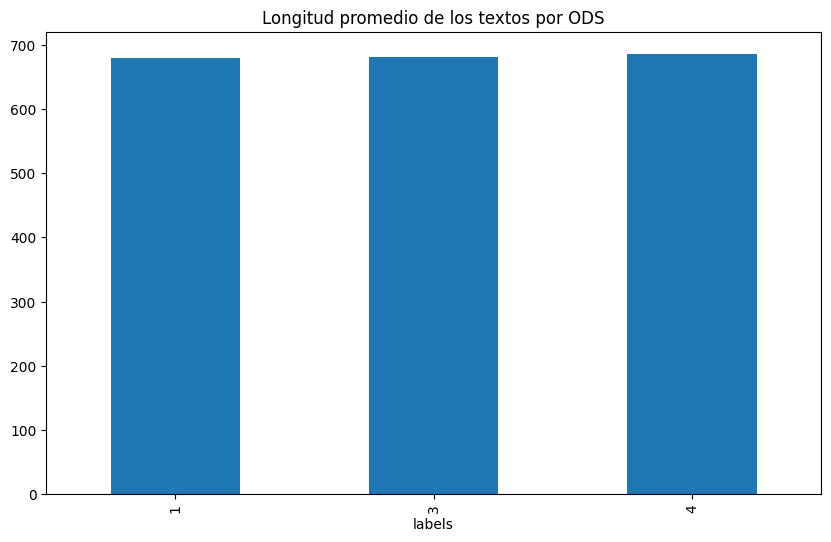

In [5]:
#Grafiquemos la longitud de los textos por ODS
import matplotlib.pyplot as plt

#Un diagrama de barras para la longitud promedio de los textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
textos_por_ods['mean'].plot(kind='bar', ax=ax)
ax.set_title('Longitud promedio de los textos por ODS')
plt.show()

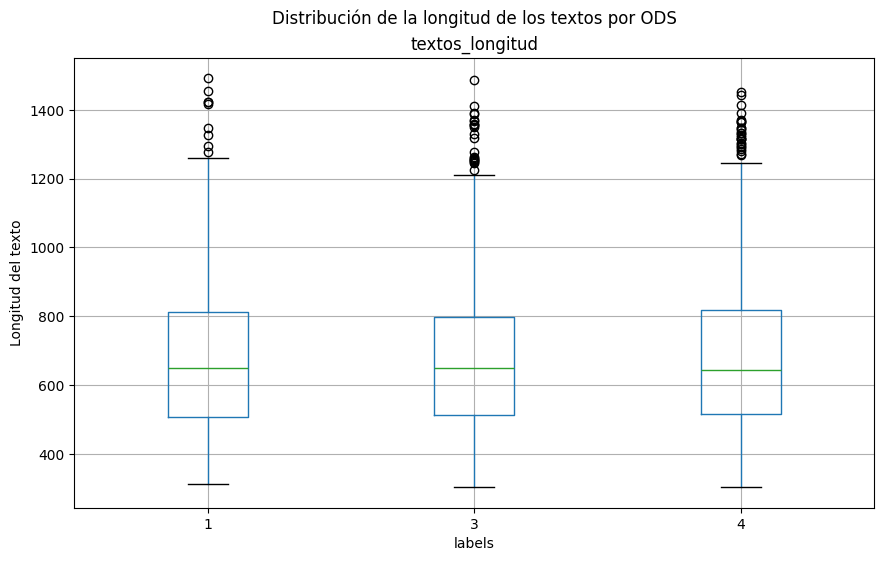

In [8]:
#Un diagrama de bigotes o boxplot para la longitud de los textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods.boxplot(column='textos_longitud', by='labels', ax=ax)
ax.set_ylabel('Longitud del texto')
fig.suptitle('Distribución de la longitud de los textos por ODS')

plt.show()

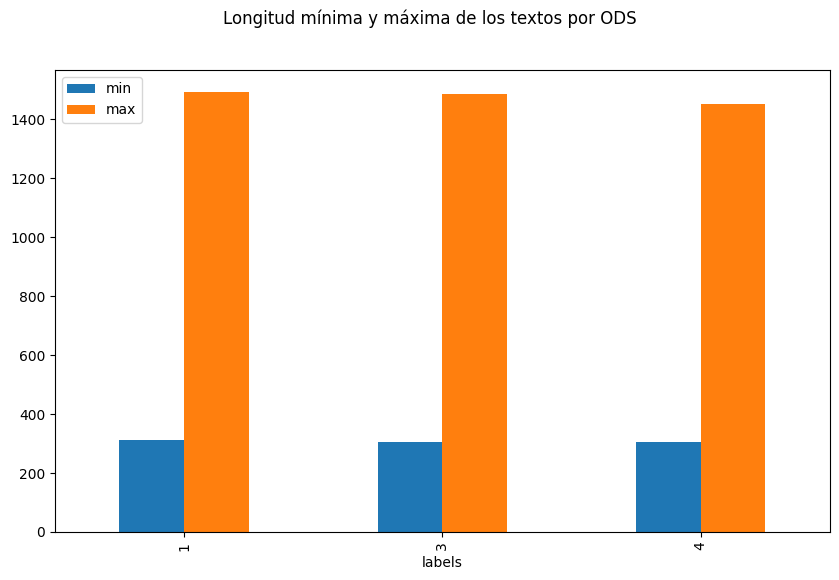

In [9]:
#Un diagrama para ver la longitud minima y maxima de los textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
textos_por_ods[['min', 'max']].plot(kind='bar', ax=ax)
fig.suptitle('Longitud mínima y máxima de los textos por ODS')
plt.show()

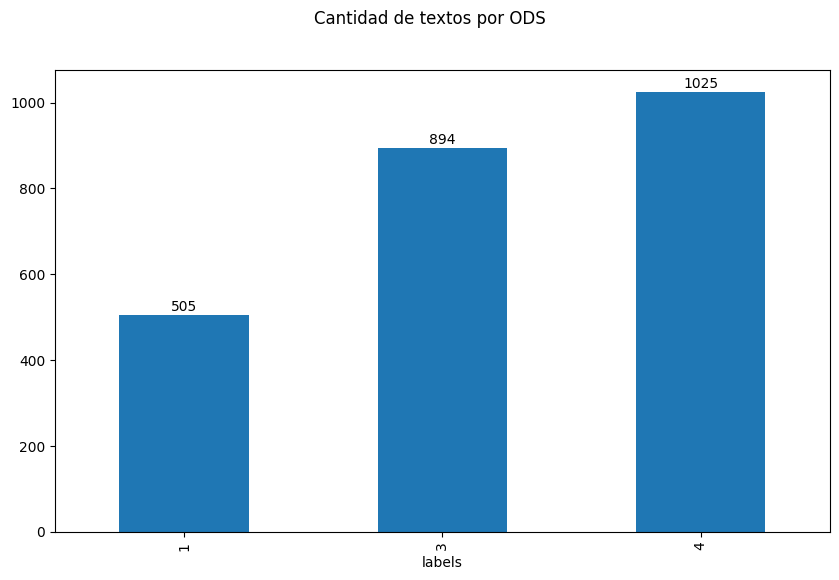

In [13]:
#Hagamos un diagrama de barras para ver la cantidad de textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods['labels'].value_counts().sort_index().plot(kind='bar', ax=ax)
fig.suptitle('Cantidad de textos por ODS')
#Pongamos el valor encima de cada barra
for indice_barra, valor in enumerate(df_ods['labels'].value_counts().sort_index()): 
    ax.text(indice_barra, valor + 3, str(valor), ha='center', va='bottom')
plt.show()

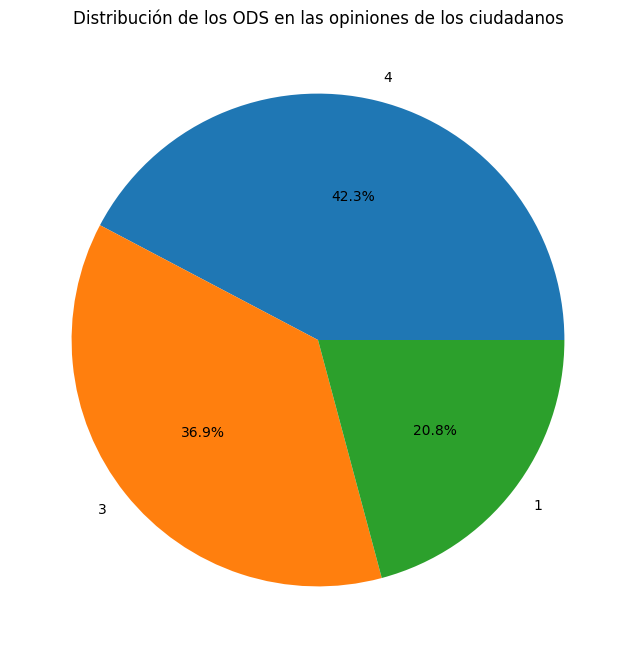

In [14]:
#Hagamos un pie chart para ver la distribución de los ODS (1,3,4)
ods_counts = df_ods['labels'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ods_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_ylabel('')
ax.set_title('Distribución de los ODS en las opiniones de los ciudadanos')
plt.show()


**Perfilamiento de datos**

Se nos han compartido 2424 registros de opiniones ciudadanas sobre problemáticas sociales relacionadas con los Objetivos de Desarrollo Sostenible (ODS), etiquetados según 1 (Fin de la pobreza), 3 (Salud y bienestar) y 4 (Educación de calidad). 

El dataset está compuesto por dos columnas que describen las generalidades de una opinión ciudadana. Está la columna `textos`, la cual contiene la opinión de un ciudadano (en lenguaje natural, y además en el idioma español), claramente corresponde a texto. También encontramos la columna `labels`, la cual da una única clasificación a la opinión en cuestión, es una columna o variable numérica. 

La mayoría de las opiniones ciudadanas en el conjunto de datos pertenece al ODS 4, Educación de calidad (42.3%). Seguido, está ODS 3, Saluds y Bienestar (36.9%). Finalmente, el 20.8% de las opiniones pertenecen al ODS 1, Fin de la Pobreza. 

Conocemos que la longitud promedio de todas las opiniones sin distinción es de aproximadamente 683 caracteres, con un mínimo de 303 y un máximo de 1.492 caracteres. Ahora bien, la longitud promedio de las opiniones, clasificadas por ODS, es similar, siendo cercana a los 700 caracteres. 

Gracias al boxplot, sabemos que la mayoría de opiniones están entre los 500 y 800 caracteres, con algunos outliers o datos fuera de este rango, los cuales corresponden a texto más extensos, que van de 1200 caracteres hasta un poco más de 1400 caracteres. 

En general, los datos que tenemos tienen opiniones con extensión similar y hace posible dar un procesamiento coherente para ellas:
- La longitud de los textos se encuentra balanceada, mas no la cantidad de textos por ODS. 
- La cantidad de opiniones por ODS está desbalanceada. Claramente, hay muchas más opiniones de las ODS 4 y 3 en comparación con la ODS 1. De hecho, la ODS-1 tiene aproximadamente la mitad de datos que la ODS-4. Para la 1 hay 505 opiniones; para la 3, 894; para la 4, 1025.

## 1.2 Análisis de calidad de los datos

### Completitud: Revisión de nulos y cadenas vacías

In [15]:
df_ods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   textos           2424 non-null   object
 1   labels           2424 non-null   int64 
 2   textos_longitud  2424 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 56.9+ KB


In [16]:
# Verificamos nulos y vacíos en la columna textos
num_nulls = df_ods['textos'].isnull().sum()
num_empty = (df_ods['textos'].str.strip() == '').sum()

print("Número de valores nulos en 'textos':", num_nulls)
print("Número de cadenas vacías en 'textos':", num_empty)

Número de valores nulos en 'textos': 0
Número de cadenas vacías en 'textos': 0


No hay datos nulos, ni cadenas vacías en los datos. Tanto la columna textos como la columna de etiquetas o labels están completas. Ambas tienen 2424 datos. 

### Unicidad: Revision de duplicados: totales y parciales

In [17]:
#Veamos los duplicados totales
num_duplicados = df_ods.duplicated().sum()
print("Número de filas duplicadas en el dataset:", num_duplicados)

Número de filas duplicadas en el dataset: 0


In [18]:
#Agrupamos por texto y contamos cuántos labels distintos tiene
conflictos = df_ods.groupby('textos')['labels'].nunique()

#Nos quedamos solo con los que tienen más de 1 etiqueta distinta
conflictos = conflictos[conflictos > 1]

print("Número de textos con varias etiquetas:", conflictos.shape[0])


Número de textos con varias etiquetas: 0


Verificamos que no existen filas duplicadas ni duplicados parciales, que en este caso son textos repetidos con etiquetas distintas.

### Consistencia: Confirmar que los formatos de las columnas son acordes a lo esperado

In [19]:
#Revisamos que todos los registros en la columna 'textos' sean string
tipos_textos = df_ods['textos'].apply(type).unique()
print("Tipos de datos en 'textos':", tipos_textos)

#Revisamos que todos los registros en  la columna'labels' sean numéricos
tipos_labels = df_ods['labels'].apply(type).unique()
print("Tipos de datos en 'labels':", tipos_labels)

Tipos de datos en 'textos': [<class 'str'>]
Tipos de datos en 'labels': [<class 'int'>]


En efecto, los tipos de datos son los esperados para cada columna.

### Validez: Confirmar que los valores estén dentro de rangos lógicos para el contexto del problema

En nuestro caso, vamos a revisar que los tipos de ODS sean 1, 3 o 4. Ningún otro tipo.

In [20]:
valores_unicos = df_ods['labels'].unique()
print("Valores únicos en labels:", valores_unicos)

Valores únicos en labels: [4 3 1]


En efecto, los únicos tipos de ODS en los datos que recibimos son 1, 3 y 4.

## Enfoque analítico

Para el proyecto de ODS y opiniones ciudadanas, hemos sido contratados para construir un modelo de aprendizaje automático que pueda clasificar automáticamente las opiniones de la ciudadanía en relación con los Objetivos de Desarrollo Sostenible (ODS) 1, 3 y 4. En ese contexto, y una vez entendidos los datos, identificamos:

- **Tipo de analítica**: Predictiva, porque queremos saber qué va a pasar, en este caso: ¿A qué ODS (1, 3 o 4) va a pertenecer la nueva opinión de un cuidadano?

- **Tipo de aprendizaje**: Supervisado, debido a que contamos con un dataset etiquetado. Cada registro que tenemos incluye el texto de la opinión y la etiqueta que indica a qué ODS está asociada (1, 3 o 4), lo que permite entrenar el modelo con ejemplos donde conocemos la respuesta. Siempre queremos predecir el tipo de ODS: 1-ODS, 3-ODS, 4-ODS de la opinión.

- **Tipo de tarea supervisada**: Clasificación, ya que la variable objetivo es el tipo de ODS y puede tomar los valores 1, 3 o 4. Toma el valor 1 para ODS de fin de la pobreza, 3 para salud y bienestar y 4 para educación de calidad.

# Etapa 2. Procesamiento de texto: tokenización y limpieza de palabras

Comencemos haciendo una función para eliminar ruido en los registros de los textos:
1. Pasemos todo a minúsculas
2. Eliminamos signos de puntuación (no incluye tildes), pero si puntos, comas, comillas, entre otros.
3. Reemplazamos números por su equivalente en palabras


In [26]:
import nltk
import string
from nltk.corpus import stopwords
from num2words import num2words

#Esto se hara cuando el texto ya este tokenizado
def limpiar_texto(texto_tokenizado):
    texto_limpio_tokenizado = []
    for palabra in texto_tokenizado:
        # Pasar a minúsculas
        palabra = palabra.lower()
        # Eliminar signos de puntuación
        palabra = palabra.translate(str.maketrans('', '', string.punctuation))
        # Reemplazar números por su representación en palabras
        if palabra.isdigit():
            palabra = num2words(palabra, lang='es')
        # Agregar si no está vacía
        if palabra:
            texto_limpio_tokenizado.append(palabra)
    return texto_limpio_tokenizado

Para procesar las opiniones de los ciudadanos, hay que hacer tokenización, lematización y normalización. Recodermos un poco estos conceptos para tener claro lo que vamos a realizar:

**Tokenización:** dividimos las frases o las oraciones en tokens (palabras)

**Lematización:** llevamos cada palabra o token a su base gramatical (comimos -> comer)

**Normalización:** aplicamos la función que reduce ruido en los tokens para poder unificar el texto

Hacemos el proceso de tokenización

In [21]:
#Tokenizamos el texto (cada registro de textos en el dataframe)
def tokenizar_columna(df, columna_texto, nueva_columna):
    tokens_col = []
    #Hacemos un split por espacio para tokenizar
    for texto in df[columna_texto]:
        tokens_col.append(str(texto).split())
    df[nueva_columna] = tokens_col
    return df

df_ods = tokenizar_columna(df_ods, 'textos', 'tokens')

#Veamos cómo quedaron los tokens
df_ods[['textos', 'tokens']].head()

,textos,tokens
0,"""Aprendizaje"" y ""educación"" se consideran sinó...","[""Aprendizaje"", y, ""educación"", se, consideran..."
1,Para los niños más pequeños (bebés y niños peq...,"[Para, los, niños, más, pequeños, (bebés, y, n..."
2,"Además, la formación de especialistas en medic...","[Además,, la, formación, de, especialistas, en..."
3,En los países de la OCDE se tiende a pasar de ...,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,"[Este, grupo, se, centró, en, las, personas, q..."


Eliminamos ruido para una lematización adecuada

In [27]:
#Eliminamos ruido para poder hacer lematización después
#Debemos hacerlo, o tokens como '"aprendizaje"' no se lematizarán bien, pues tienen comillas o signos de puntuación y 
#spacy puede no reconocer bien el token
df_ods["tokens_limpios"] = df_ods["tokens"].apply(limpiar_texto)

#Veamos cómo quedaron los tokens limpios
df_ods[['tokens', 'tokens_limpios']].head()

,tokens,tokens_limpios
0,"[""Aprendizaje"", y, ""educación"", se, consideran...","[aprendizaje, y, educación, se, consideran, si..."
1,"[Para, los, niños, más, pequeños, (bebés, y, n...","[para, los, niños, más, pequeños, bebés, y, ni..."
2,"[Además,, la, formación, de, especialistas, en...","[además, la, formación, de, especialistas, en,..."
3,"[En, los, países, de, la, OCDE, se, tiende, a,...","[en, los, países, de, la, ocde, se, tiende, a,..."
4,"[Este, grupo, se, centró, en, las, personas, q...","[este, grupo, se, centró, en, las, personas, q..."


Hacemos el proceso de lematización

In [ ]:
#Lematizamos los tokens

import spacy

#Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

def lematizar_los_tokens(df, columna_tokens, nueva_columna):
    lemas_col = []
    for lista_tokens in df[columna_tokens]:
        #Creamos un doc de spaCy a partir de los tokens, pues asi spacy hace la lematización
        doc = nlp(" ".join(lista_tokens))
        lemas = []
        #para cada palabra en el doc (en la frase)
        for token in doc:
            if not token.is_space:
                lemas.append(token.lemma_)
        #token.lemma_ devuelve la raíz de cada palabra
        #se hace una lista de lemas con las palabra ya lematizadas que no son espacios
        lemas = [tok.lemma_ for tok in doc if not tok.is_space]
        lemas_col.append(lemas)
    df[nueva_columna] = lemas_col
    return df

#Aplicamos la lematización
df_ods = lematizar_los_tokens(df_ods, "tokens_limpios", "tokens_lematizados")

#Veamos cómo quedaron los tokens lematizados
display(df_ods[["tokens_limpios", "tokens_lematizados"]].head())


,tokens_limpios,tokens_lematizados
0,"[aprendizaje, y, educación, se, consideran, si...","[aprendizaje, y, educación, él, considerar, si..."
1,"[para, los, niños, más, pequeños, bebés, y, ni...","[para, el, niño, más, pequeño, bebé, y, niño, ..."
2,"[además, la, formación, de, especialistas, en,...","[además, el, formación, de, especialista, en, ..."
3,"[en, los, países, de, la, ocde, se, tiende, a,...","[en, el, país, de, el, ocde, él, tender, a, pa..."
4,"[este, grupo, se, centró, en, las, personas, q...","[este, grupo, él, centrar, en, el, persona, qu..."


Hacemos una normalización final con el fin de dejar el texto en un mismo formato:
1. Eliminamos stopwords
2. Quitamos las tildes, que no estaban incluidas en la vez que quitamos los signos de puntuación
3. Nos aseguramos de no dejar palabras vacías

In [ ]:
import string, unicodedata 

#Descargamos las stopwords y las definimos en español
#Recordar super importante: las stopwords son palabras que son usuales en un idioma, en este caso el español, pero que no aportan casi valor para analizar el texto
#Por ejemplo: el, un, para, por, y
nltk.download("stopwords")
stop_words = set(stopwords.words("spanish"))

#Hagamos una normalización final para eliminar cualquier ruido que haya quedado

#Función para quitar tildes
def quitar_tildes(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def normalizar_texto(texto_tokenizado):
    texto_limpio_tokenizado = []
    for palabra in texto_tokenizado:
        #Quitamos las tildes
        if 'á' in palabra or'é' in palabra or 'í' in palabra or'ó' in palabra or'ú' in palabra or 'ü' in palabra:
            palabra = quitar_tildes(palabra)
        #Eliminamos stopwords y palabras vacías
        if palabra and palabra not in stop_words:
            texto_limpio_tokenizado.append(palabra)
    return texto_limpio_tokenizado

#Aplicamos la normalización final
df_ods["tokens_finales"] = df_ods["tokens_lematizados"].apply(normalizar_texto)

#Veamos cómo quedaron los tokens finales
df_ods[["tokens_lematizados", "tokens_finales"]].head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokens_lematizados,tokens_finales
0,"[aprendizaje, y, educación, él, considerar, si...","[aprendizaje, educacion, considerar, sinonir, ..."
1,"[para, el, niño, más, pequeño, bebé, y, niño, ...","[niño, mas, pequeño, bebe, niño, pequeño, capa..."
2,"[además, el, formación, de, especialista, en, ...","[ademas, formacion, especialista, medicina, ge..."
3,"[en, el, país, de, el, ocde, él, tender, a, pa...","[pais, ocde, tender, pasar, curso, obligatorio..."
4,"[este, grupo, él, centrar, en, el, persona, qu...","[grupo, centrar, persona, padecer, trastorno, ..."


Continuamos con el proceso de vectorización, que es el último paso en el preprocesamiento de textos. Este permite representar las palabras de una forma numérica, de forma que puedan ser procesados con los distintos modelos, pues no las comprenden como texto.

Vectorizar, en nuestro caso, lo podemos pensar como:
- Construir una matriz texto-término (cada palabra es un término).
- Usar TF-IDF, que nos dice que tan relevante es la palabra para describir ese texto (opinión).

TF-IDF:
Da un puntaje alto a palabras que:
- Palabras que aparecen mucho en un texto concreto (TF alto)
- Pero que son poco comunes en los demás textos (IDF alto)

In [ ]:
#Preparamos los documentos como strings, unimos los tokens finales dejando un espacio entre ellos
#Todos los documentos se llaman corpus
corpus = df_ods["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")

corpus

0       aprendizaje educacion considerar sinonir escol...
1       niño mas pequeño bebe niño pequeño capacitacio...
2       ademas formacion especialista medicina general...
3       pais ocde tender pasar curso obligatorio optat...
4       grupo centrar persona padecer trastorno mental...
                              ...                        
2419    tutoer carrera diseñar apoyar estudiante conse...
2420    fuente ministerio educacion tasa interno retor...
2421    dos mil diez pnud haber ser pionero puesta mar...
2422    embargo falla mercado implicar competencia sol...
2423    aunque existir programa convertir el especific...
Name: tokens_finales, Length: 2424, dtype: object

Vamos a crear el vectorizador para TF-IDF teniendo en cuenta lo siguiente:
1. No vamos a agregar preprocesamiento de más por parte del vectorizador: ya las palabras están en minúscula y ya se limpiaron los datos

2. Ignoraremos las palabras que aparecen en menos de dos documentos, ya que su ocurrencia es muy extraña y no ayuda a realmente distinguir un tipo de ods. De hecho, hasta podrían ser errores ortográficos.

3. Ignoraremos las palabras que aparecen en más del 90% de los documentos, ya que al ser demasiado comunes no aportan a distinguir un tipo de ods, por ejemplo palabras como "problema" o "ods" no serían útiles, pero podrían repetirse bastante bajo este contexto.

4. Solo vamos a considerar tokens con al menos dos letras, que no ayudan a hacer distinción. Dejamos dos, porque las palabras no o sí pueden ser útiles al distinguir opiniones.

5. No vamos a fijarnos en números (como años: 2006, 2007) para distinguir una opinión, ya que no resulta útil para clasificar. Estos pudieron no haber estado puros (2006año, en2007) y por ello pudieron haber estado presentes luego del filtrado. De todas formas, no los consideraremos.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el vectorizador TF-IDF
tfidf = TfidfVectorizer(
    preprocessor=None, #No aplicamos más preprocesamiento, ya limpiamos antes
    lowercase=False, #No convertimos a minúsculas, ya lo hicimos
    min_df=2, #Ignoramos palabras que aparecen en menos de 2 documentos
    max_df=0.90, #Ignoramos palabras que aparecen en más del 90% de los documentos (demasiado comunes, como si fuera "ods", no aporta)
    token_pattern=r"(?u)\b[^\W\d_]{2,}\b" #Solo consideramos tokens con al menos 2 letras (ignoramos números y palabras de una letra)
)

X_tfidf = tfidf.fit_transform(corpus) #Esto crea la matriz TF-IDF de opinion-terminos


In [54]:
#Obtenemos todas las palabras únicas que el vectorizador vio en el corpus
terminos = tfidf.get_feature_names_out()

#Veamos el tamaño del vocabulario
print("Tamaño del total de términos:", len(terminos))

#Veamos una parte de la matriz en forma de DataFrame para saber si la vectorización se hizo bien
#Veamos las primeras 5 filas
df_preview = pd.DataFrame( X_tfidf[:5].toarray(),  columns=terminos)
#Veamos las primeras 10 columnas, no todas las palabras
df_preview.iloc[:, :10]


Tamaño del total de términos: 4905


,abajo,abandonar,abandono,abarcar,abierto,abitur,abogar,abolir,abordado,abordaje
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.147916,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [57]:
import numpy as np

def top_terminos(doc_id, top):
    row = X_tfidf[doc_id].toarray().ravel()
    indices = np.argsort(-row)[:top]
    return [(terminos[i], float(row[i])) for i in indices if row[i] > 0]

#Mosrtremos los términos más importantes del documento 0 (su top 10) y sus puntos ITF-IDF
print(top_terminos(0, 10)) 


[('organizacion', 0.35425636768507385), ('considerar', 0.30096281418967274), ('editorial', 0.29824942119612274), ('auxiliar', 0.27571688503055786), ('extension', 0.2540145699642186), ('inadecuado', 0.23768880251932986), ('escolarizacion', 0.22781911912280323), ('establecido', 0.21580050884624385), ('formal', 0.2145221698350767), ('volver', 0.21328317063825086)]


# Etapa 3. Modelado
Se propondrán diferentes modelos para cumplir con la clasificación de los textos

### 3.1. Estudiante 3 - Ana María Hernández Lasso: Modelo de Regresión Logística

**¿Qué es el modelo de regresión logística?**

**Justificación de la elección**

**¿Cómo se manejó el desbalance de la cantidad de opiniones por ODS?**

=== Logistic Regression (Balanced) ===
              precision    recall  f1-score   support

           1      0.960     0.950     0.955       101
           3      0.967     0.972     0.969       179
           4      0.980     0.980     0.980       205

    accuracy                          0.971       485
   macro avg      0.969     0.968     0.968       485
weighted avg      0.971     0.971     0.971       485



C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


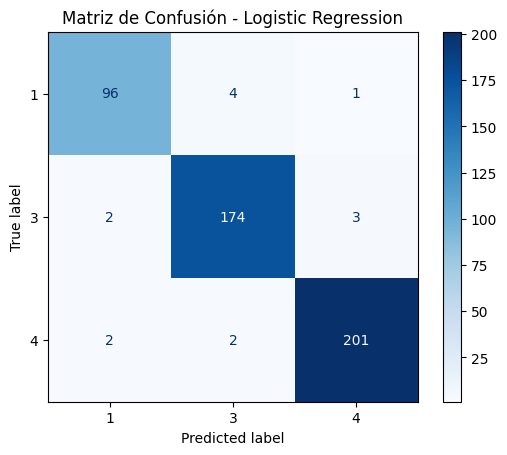

In [58]:
#ACA VOYY

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y = columna objetivo
y = df_ods["labels"]

# División train/test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Crear modelo
log_reg = LogisticRegression(
    max_iter=2000,            # suficiente para convergencia
    class_weight="balanced",  # corrige desbalance


#TOCA EXPLICAR LO DEL DESBALANCE
    solver="lbfgs",           # robusto en multiclase
    multi_class="ovr"         # one-vs-rest
)

# Entrenar
log_reg.fit(X_train, y_train)

# Predecir
y_pred = log_reg.predict(X_test)

# Reporte de métricas
print("=== Logistic Regression (Balanced) ===")
print(classification_report(y_test, y_pred, digits=3))

# Matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test, y_test, cmap="Blues"
)
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()


**¿Cómo se interpretan estos resultados?**